In [393]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [394]:
train = pd.read_csv('/home/hasan/Desktop/DATA_SET/loan-prediction-problem-dataset/train.csv')

In [395]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [396]:
train.shape

(614, 13)

In [397]:
test.shape

(367, 12)

In [398]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [399]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [400]:
train.fillna(method='bfill', inplace=True)

In [401]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [402]:
#DATA ANALYSIS

In [403]:
#total numbe of loan
train['Loan_ID'].nunique()

614

In [404]:
#two types of gender
train['Gender'].nunique()

2

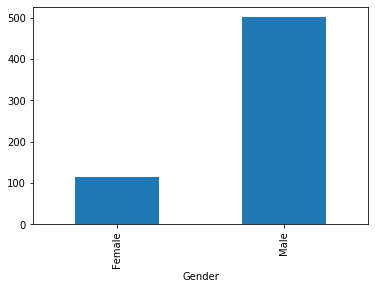

In [405]:
gender_count = train.groupby(['Gender']).Gender.agg('count')
gender_count.plot(kind='bar')

In [406]:
#finding total number of female and total numbe of male
t_male = train[train['Gender']=='Male'].count()[0]
t_female = train[train['Gender']=='Female'].count()[0]

In [407]:
#count and percent of male and female
p_male = train[train['Gender']=='Male'].count()[0] / train.isnull().count()[0]
p_female = train[train['Gender']=='Female'].count()[0] / train.isnull().count()[0]

df = pd.DataFrame({'count':[t_male,t_female], 'percent':[p_male, p_female]})
df = df.rename(index={0:'male', 1:'female'})
df

,count,percent
male,501,0.815961
female,113,0.184039


In [408]:
#the ratio of male and female
train[train['Gender']=='Male'].count()[0]/ train[train['Gender']=='Female'].count()[0]

4.433628318584071

In [409]:
#Married column

In [410]:
#counting married and nonmarried based on gendfer
train.groupby(['Gender','Married']).Married.agg(['count'])

count
Gender Married       
Female No          81
       Yes         32
Male   No         134
       Yes        367

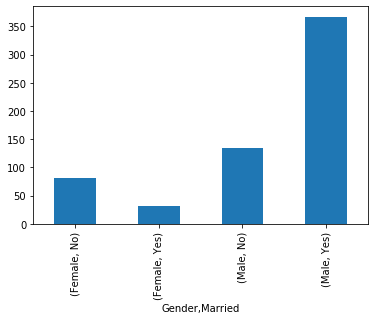

In [411]:
train.groupby(['Gender','Married']).Married.agg('count').plot(kind='bar')

In [412]:
#married and not married in percentage based on Gender
male = train[train['Gender']=='Male']
male_married = male[male['Married']=='Yes'].count()[0]
male_unmarried = male[male['Married']=='No'].count()[0]

female = train[train['Gender']=='Female']
female_married = female[female['Married']=='Yes'].count()[0]
female_unmarried = female[female['Married']=='No'].count()[0]

male_married_p = male_married/t_male*100
male_notmarried_p = male_unmarried/t_male*100
female_married_p = female_married/t_female*100
female_notmarried_p = female_unmarried/t_female*100

df = pd.DataFrame({'married':[male_married_p,female_married_p], 'unmarried':[male_notmarried_p,female_notmarried_p]})
df.index = ['male','female']
df

,married,unmarried
male,73.253493,26.746507
female,28.318584,71.681416


In [413]:
#Dependents column

In [414]:
#unique dependents
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [415]:
#total number of dependents based on dependents
train.groupby(['Dependents']).Dependents.agg('count')

Dependents
0     354
1     104
2     105
3+     51
Name: Dependents, dtype: int64

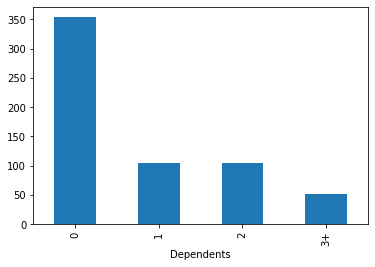

In [416]:
#counting dependents using graph
train.groupby(['Dependents']).Dependents.agg('count').plot(kind='bar')

In [417]:
#counting dependents based on Gender
train.groupby(['Gender','Dependents']).Dependents.agg(['count'])

count
Gender Dependents       
Female 0              83
       1              19
       2               8
       3+              3
Male   0             271
       1              85
       2              97
       3+             48

In [418]:
#counting dependents based on Gender, Married and Dependents
number = train.groupby(['Gender','Married','Dependents']).Dependents.agg(['count'])
number

count
Gender Married Dependents       
Female No      0              62
               1              13
               2               3
               3+              3
       Yes     0              21
               1               6
               2               5
Male   No      0             114
               1              10
               2               6
               3+              4
       Yes     0             157
               1              75
               2              91
               3+             44

Text(0, 0.5, 'number of dependents')

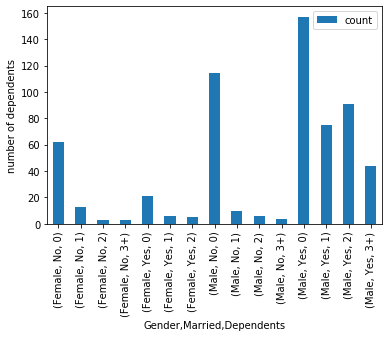

In [419]:
#drowing the graph of previous count
number.plot(kind='bar')
plt.ylabel('number of dependents')

In [420]:
#Education column

In [421]:
#unique of Education
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [422]:
#total number of Graduate and Not Graduate
education_count = train.groupby('Education').Education.agg('count')
education_count

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Text(0, 0.5, 'number')

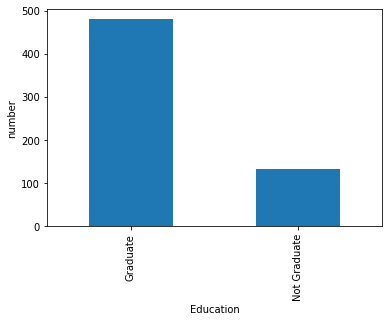

In [423]:
#graph of Graduate and Not Graduate
education_count.plot(kind='bar')
plt.ylabel('number')

In [424]:
#number of graduation and not graduation based on Gender
train.groupby(['Gender','Education']).Education.agg(['count'])

count
Gender Education          
Female Graduate         93
       Not Graduate     20
Male   Graduate        387
       Not Graduate    114

In [425]:
#count and percent of graduate and not graduate
total_graduate = train[train['Education']=='Graduate'].count()[0]
total_notgraduate = train[train['Education']=='Not Graduate'].count()[0]

gra_percent = total_graduate/train.isnull().count()[0]
notgra_percent = total_notgraduate/train.isnull().count()[0]
df = pd.DataFrame({'count':[total_graduate,total_notgraduate], 'percent':[gra_percent,notgra_percent]})
df.index = ['graduate','not graduate']
df

,count,percent
graduate,480,0.781759
not graduate,134,0.218241


In [426]:
#graduate and not graduate in percentage based on Gender
male = train[train['Gender']=='Male']
male_graduate = male[male['Education']=='Graduate'].count()[0]
male_notgraduate = male[male['Education']=='Not Graduate'].count()[0]

female = train[train['Gender']=='Female']
female_graduate = female[female['Education']=='Graduate'].count()[0]
female_notgraduate = female[female['Education']=='Not Graduate'].count()[0]

male_graduate_p = male_graduate/t_male*100
male_notgraduate_p = male_notgraduate/t_male*100
female_graduate_p = female_graduate/t_female*100
female_notgraduate_p = female_notgraduate/t_female*100

df = pd.DataFrame({'count':[t_male,t_female], 'graduate_per':[male_graduate_p,female_graduate_p], 'not graduate_per':[male_notgraduate_p,female_notgraduate_p]})
df.index = ['male','female']
df

,count,graduate_per,not graduate_per
male,501,77.245509,22.754491
female,113,82.300885,17.699115


In [427]:
#Self Employed

In [428]:
#unique of Self_Employed
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

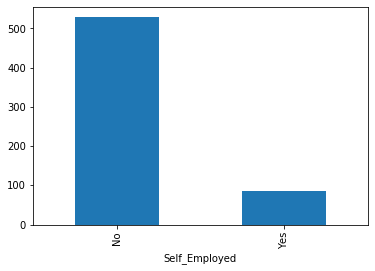

In [429]:
#number of self employed and not self employed
train.groupby('Self_Employed').Self_Employed.agg('count').plot(kind='bar')

In [430]:
train.groupby(['Gender','Self_Employed']).Self_Employed.agg(['count'])

count
Gender Self_Employed       
Female No                98
       Yes               15
Male   No               430
       Yes               71

In [431]:
#employed and not employed in total and percentage based on Gender
male = train[train['Gender']=='Male']
male_employed = male[male['Self_Employed']=='Yes'].count()[0]
male_noemployed = male[male['Self_Employed']=='No'].count()[0]

female = train[train['Gender']=='Female']
female_employed = female[female['Self_Employed']=='Yes'].count()[0]
female_noemployed = female[female['Self_Employed']=='No'].count()[0]

male_employed_p = male_employed/t_male*100
male_notemployed_p = male_noemployed/t_male*100
female_employed_p = female_employed/t_female*100
female_noemployed_p = female_noemployed/t_female*100

df = pd.DataFrame({'count':[t_male,t_female], 'emloyed_per':[male_employed_p,female_employed_p], 'not employed_per':[male_notemployed_p,female_noemployed_p]})
df.index = ['male','female']
df

,count,emloyed_per,not employed_per
male,501,14.171657,85.828343
female,113,13.274336,86.725664


In [432]:
#ApplicantIncome column

In [433]:
train.groupby('Gender').ApplicantIncome.agg(['sum','min','mean','max'])

,sum,min,mean,max
Gender,,,,
Female,536761,210,4750.097345,19484
Male,2780963,150,5550.824351,81000


In [434]:
#sum, minimum,mean, and maximum incomee based on Gender
train.groupby(['Gender']).ApplicantIncome.agg(['sum','min','mean','max'])

,sum,min,mean,max
Gender,,,,
Female,536761,210,4750.097345,19484
Male,2780963,150,5550.824351,81000


In [435]:
#sum, min, mean and max of ApplicantIncome based on Self_Employed
df = train.groupby(['Self_Employed']).ApplicantIncome.agg(['sum','min','mean','max'])
df

,sum,min,mean,max
Self_Employed,,,,
No,2634447,150,4989.482955,81000
Yes,683277,674,7945.081395,63337


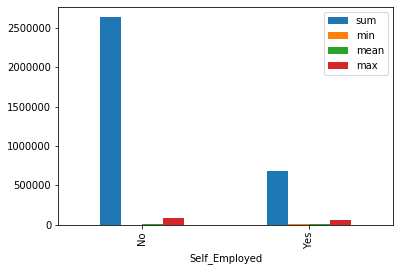

In [436]:
df.plot(kind='bar')

In [437]:
#sum, min, mean, and max of ApplicantIncome based on Gender and Self_Employed 
train.groupby(['Gender','Self_Employed']).ApplicantIncome.agg(['sum','min','mean','max'])

sum   min         mean    max
Gender Self_Employed                                   
Female No              401419   210  4096.112245  16692
       Yes             135342  2500  9022.800000  19484
Male   No             2233028   150  5193.088372  81000
       Yes             547935   674  7717.394366  63337

In [438]:
#CoapplicantIncome column

In [439]:
df = train.groupby('Gender').CoapplicantIncome.agg(['sum','min','mean','max'])
df

,sum,min,mean,max
Gender,,,,
Female,124097.000000,0.0,1098.203540,41667.0
Male,871347.919989,0.0,1739.217405,33837.0


In [440]:
#LoanAmount column

In [441]:
#total amount of loan
total_loan_amount = train['LoanAmount'].sum()

#sum of loan in male and female
t_male_loan = train[train['Gender']=='Male']['LoanAmount'].sum()
t_female_loan = train[train['Gender']=='Female']['LoanAmount'].sum()


#percent of loan
p_male_loan = t_male_loan/total_loan_amount*100
p_female_loan = t_female_loan/total_loan_amount*100

df = pd.DataFrame({'total_loan':[t_male_loan,t_female_loan], 'percent_of_loan':[p_male_loan,p_female_loan]})
df.index = ['male','female']
df

,total_loan,percent_of_loan
male,75741.0,84.250278
female,14159.0,15.749722


In [442]:
#total amount of loan based on Gender and Education
train.groupby(['Gender','Education']).LoanAmount.agg(['sum'])

sum
Gender Education            
Female Graduate      11965.0
       Not Graduate   2194.0
Male   Graduate      61957.0
       Not Graduate  13784.0

In [443]:
male = train[train['Gender']=='Male']
male_graduate = male[male['Education']=='Graduate']
male_notgraduate = male[male['Education']=='Not Graduate']

#total sum of loan amount by male graduate and not graduate
loan_male_graduate = male_graduate['LoanAmount'].sum()
loan_male_notgraduate = male_notgraduate['LoanAmount'].sum()


female = train[train['Gender']=='Female']
female_graduate = female[female['Education']=='Graduate']
female_notgraduate = female[female['Education']=='Not Graduate']

#total sum of loan amount by female graduate and not graduate
loan_female_graduate = female_graduate['LoanAmount'].sum()
loan_female_notgraduate = female_notgraduate['LoanAmount'].sum()

#total loan
total_loan = train['LoanAmount'].sum()

#taking loan in percent based gender and education
p_mlae_gra = loan_male_graduate/total_loan*100
p_male_notgra = loan_male_notgraduate/total_loan*100
p_female_gra = loan_female_graduate/total_loan*100
p_female_notgra = loan_female_notgraduate/total_loan*100


#number of graduate based on gender
male_gra = male_graduate.count()[0]
male_notgra = male_notgraduate.count()[0]
female_gra = female_graduate.count()[0]
female_notgra = female_notgraduate.count()[0]

df = pd.DataFrame({'people_number':[male_gra,male_notgra,female_gra,female_notgra], 'total_loan':[loan_male_graduate,loan_male_notgraduate,loan_female_graduate,loan_female_notgraduate], 'loan_percent':[p_mlae_gra,p_male_notgra,p_female_gra,p_female_notgra]})
df.index = ['male_graduate','male_notgraduate','female_graduate','female_notgraduate']
df

,people_number,total_loan,loan_percent
male_graduate,387,61957.0,68.917686
male_notgraduate,114,13784.0,15.332592
female_graduate,93,11965.0,13.309232
female_notgraduate,20,2194.0,2.440489


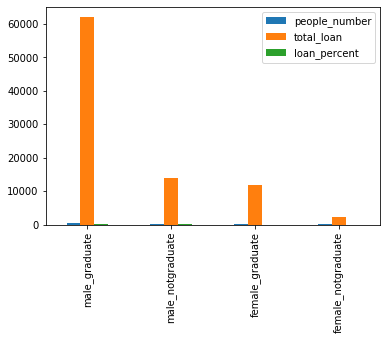

In [444]:
#graph of previous data
df.plot(kind='bar')

In [445]:
#LoanAmountTerm column

In [446]:
#unique value of Loan_Amount_Term
train['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [447]:
#number of loan_amount_term based on Loan_Amount_Term
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [448]:
#number of Loan_Amount_Term based on Gender
train.groupby(['Gender','Loan_Amount_Term']).Loan_Amount_Term.agg('count')

Gender  Loan_Amount_Term
Female  36.0                  1
        84.0                  1
        180.0                 3
        240.0                 1
        300.0                 1
        360.0               102
        480.0                 4
Male    12.0                  1
        36.0                  1
        60.0                  2
        84.0                  3
        120.0                 3
        180.0                41
        240.0                 3
        300.0                12
        360.0               424
        480.0                11
Name: Loan_Amount_Term, dtype: int64

In [449]:
#total amount of loan based on Loan_Amount_Term
loan_based_time = train.groupby(['Loan_Amount_Term']).LoanAmount.agg(['sum'])
loan_based_time

,sum
Loan_Amount_Term,
12.0,111.0
36.0,235.0
60.0,280.0
84.0,529.0
120.0,67.0
180.0,6504.0
240.0,405.0
300.0,2407.0
360.0,77085.0


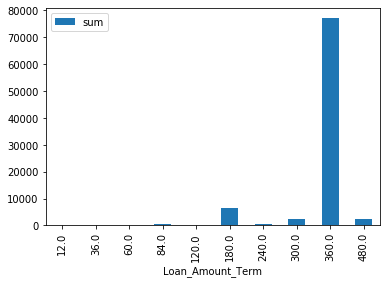

In [450]:
loan_based_time.plot(kind='bar')

In [451]:
#Property_Area

In [452]:
#unique of Property_Area
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [453]:
#total number of data in Property_Area column
total = train['Property_Area'].count()

#total number of urban, rural and semiurban
urban = train[train['Property_Area']=='Urban'].count()[0]
rural = train[train['Property_Area']=='Rural'].count()[0]
semiurban = train[train['Property_Area']=='Semiurban'].count()[0]

#percent of urban,rural and semiurban
urban_per = urban/total*100
rural_per = rural/total*100
semiurban_per = semiurban/total*100

df = pd.DataFrame({'number':[urban,rural,semiurban], 'percent':[urban_per, rural_per, semiurban_per]})
df.index = ['urban','rural','semiurban']
df

,number,percent
urban,202,32.899023
rural,179,29.153094
semiurban,233,37.947883


In [454]:
train.groupby(['Gender','Education','Property_Area']).Property_Area.agg(['count'])

count
Gender Education    Property_Area       
Female Graduate     Rural             18
                    Semiurban         46
                    Urban             29
       Not Graduate Rural              6
                    Semiurban         10
                    Urban              4
Male   Graduate     Rural            113
                    Semiurban        141
                    Urban            133
       Not Graduate Rural             42
                    Semiurban         36
                    Urban             36

In [455]:
#Credit_History

In [456]:
train['Credit_History'].unique()

array([1., 0.])

In [457]:
train['Credit_History'].value_counts()

1.0    517
0.0     97
Name: Credit_History, dtype: int64

In [458]:
#Loan_Status column

In [459]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [460]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [461]:
#dropping those columns which we don't need to predict Loan_Status

In [462]:
train.drop(['Loan_ID','Dependents','Gender','Married','Education','CoapplicantIncome','Credit_History','Property_Area'], axis=1, inplace=True)

In [463]:
train.head()

,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,No,5849,128.0,360.0,Y
1,No,4583,128.0,360.0,N
2,Yes,3000,66.0,360.0,Y
3,No,2583,120.0,360.0,Y
4,No,6000,141.0,360.0,Y


In [464]:
train.dtypes

Self_Employed        object
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Loan_Status          object
dtype: object

In [465]:
#from categorical to numerical of Loan_Status column

In [466]:
train['Loan_Status'] = train['Loan_Status'].map({'Y':'1', 'N':'0'})
train['Loan_Status'] = train['Loan_Status'].astype(int)

In [467]:
#dropping outlier

In [468]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [469]:
train = train[(train['ApplicantIncome']<10000) & (train['ApplicantIncome']>1000)]
train.head()

,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,No,5849,128.0,360.0,1
1,No,4583,128.0,360.0,0
2,Yes,3000,66.0,360.0,1
3,No,2583,120.0,360.0,1
4,No,6000,141.0,360.0,1


In [470]:
train['LoanAmount'].describe()

count    553.000000
mean     133.618445
std       58.640308
min        9.000000
25%      100.000000
50%      125.000000
75%      158.000000
max      495.000000
Name: LoanAmount, dtype: float64

In [471]:
train = train[(train['LoanAmount']>40) & (train['LoanAmount']<300)]
train.head()

,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,No,5849,128.0,360.0,1
1,No,4583,128.0,360.0,0
2,Yes,3000,66.0,360.0,1
3,No,2583,120.0,360.0,1
4,No,6000,141.0,360.0,1


In [472]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [473]:
self_employed_dummy = pd.get_dummies(train['Self_Employed'])

In [474]:
train = pd.concat([train, self_employed_dummy], axis=1)

In [475]:
train.head()

,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,No,Yes
0,No,5849,128.0,360.0,1,1,0
1,No,4583,128.0,360.0,0,1,0
2,Yes,3000,66.0,360.0,1,0,1
3,No,2583,120.0,360.0,1,1,0
4,No,6000,141.0,360.0,1,1,0


In [476]:
#spliting dataset for train and test

In [477]:
X = train.drop(['Self_Employed','Loan_Status'], axis=1)
y = train['Loan_Status']

In [478]:
#testing with different algorithm, to find best fit algorithm

In [479]:
def selecting_best_algorithm(X,y):
    algos={
        'KNeighborsClassifier':{
            'model': KNeighborsClassifier(),
            'params':{
                'n_neighbors':[5,10,15],
                'leaf_size':[30, 35]
            }
        },
        'LogisticRegression':{
            'model': LogisticRegression(),
            'params':{
                'C':[1,2],
                'fit_intercept':[True,False],
                'intercept_scaling':[1,2],
                'solver':['lbfgs'],
                'max_iter':[1000,10000]    
            }
        },
        'BernoulliNB':{
            'model': BernoulliNB(),
            'params':{
                'alpha':[1.0,2.0],
                'fit_prior':[True, False]
            }
        },
        'RandomForestClassifier':{
            'model': RandomForestClassifier(),
            'params':{
                'bootstrap':[True, False],
                'n_estimators':[100,200,300,1000]
            }
        }      
    }
    
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=.3, random_state=0)
    for name, algo in algos.items():
        gs = GridSearchCV(algo['model'], algo['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        
        score.append({
            'model': name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(score, columns=['model','best_score','best_params'])

In [480]:
selecting_best_algorithm(X,y)

,model,best_score,best_params
0,KNeighborsClassifier,0.64875,"{'leaf_size': 30, 'n_neighbors': 15}"
1,LogisticRegression,0.68625,"{'C': 1, 'fit_intercept': True, 'intercept_sca..."
2,BernoulliNB,0.66875,"{'alpha': 1.0, 'fit_prior': True}"
3,RandomForestClassifier,0.61750,"{'bootstrap': True, 'n_estimators': 300}"


NOTE:  The amount of data are very less for this accuracy is not good

In [481]:
n_neighbors = np.arange(1,50)
scores = []

for i in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(Xtrain, Ytrain)
    score = model.score(xtest,ytest)
    scores.append(score)

Text(0, 0.5, 'accuracy ')

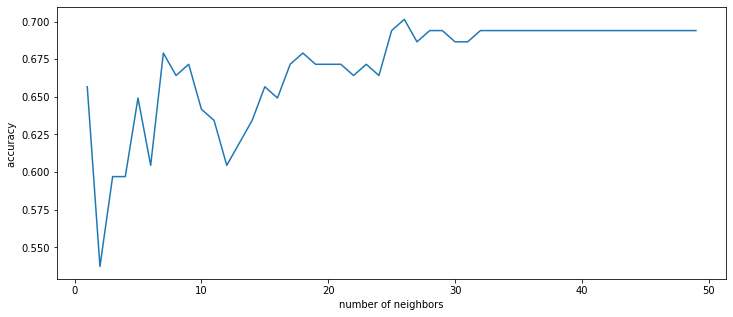

In [509]:
plt.figure(figsize=(12,5))
sns.lineplot(x=n_neighbors, y=scores)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy ')

In [510]:
#Splitting dataset for training and testing 

In [511]:
Xtrain,xtest, Ytrain,ytest = train_test_split(X,y, test_size=.25)

In [512]:
#defining Model

In [513]:
knc = KNeighborsClassifier(leaf_size=35, n_neighbors=40)
knc.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=35, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [514]:
knc.score(xtest,ytest)

0.6865671641791045